# TP SVM classification

Diane Lingrand (diane.lingrand@univ-cotedazur)

Université Nice Côte d'Azur


Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


In [1]:
# necessary imports
import time

import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix,
                             f1_score, plot_confusion_matrix)


## dataset: Iris


In [2]:
# loading the dataset
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target


In [3]:
# split into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


In [4]:
print("train: ", y_train)
print("test: ", y_test)


train:  [2 2 2 1 2 2 2 2 1 1 0 0 1 0 2 0 0 2 0 0 0 0 0 0 0 2 1 0 1 1 0 1 1 0 0 2 1
 2 1 2 1 1 1 1 1 2 2 0 0 1 0 2 1 2 2 0 2 0 0 0 1 2 2 0 2 2 1 2 0 2 1 1 0 1
 2 1 0 1 0 1 1 0 1 2 0 0 2 1 2 1]
test:  [1 2 0 2 1 0 2 2 2 1 1 2 2 1 1 0 0 1 0 1 1 2 2 2 0 0 0 1 1 1 0 1 2 2 2 1 0
 1 0 0 1 1 2 2 1 2 0 2 0 1 0 2 1 0 0 2 2 0 2 0]


### classification of only 2 classes


In [5]:
# we choose to remove class with label 2 (Iris Virginica)
X_trainBinaire = X_train[y_train != 2]
y_trainBinaire = y_train[y_train != 2]
X_testBinaire = X_test[y_test != 2]
y_testBinaire = y_test[y_test != 2]


In [6]:
# verification that we have binary labels for only 2 classes
print("train: ", y_trainBinaire)
print("test: ", y_testBinaire)


train:  [1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1
 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1]
test:  [1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0
 0 0]


In [7]:
# default constructor
mySvcBin = svm.SVC(kernel="linear")
# learning
time_start = time.perf_counter()
mySvcBin.fit(X_trainBinaire, y_trainBinaire)
time_elapsed = time.perf_counter() - time_start
print("learning done in %.2f seconds" % (time_elapsed))


learning done in 0.00 seconds


F1 score :  1.0


/home/joris/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


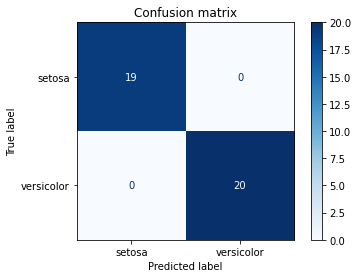

In [8]:
# test performances
y_predBinaire = mySvcBin.predict(X_testBinaire)

disp = plot_confusion_matrix(
    mySvcBin,
    X_testBinaire,
    y_testBinaire,
    display_labels=list(iris.target_names)[0:2],
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix")
print("F1 score : ", f1_score(y_predBinaire, y_testBinaire))


### classification of all classes


learning done in 0.0 seconds


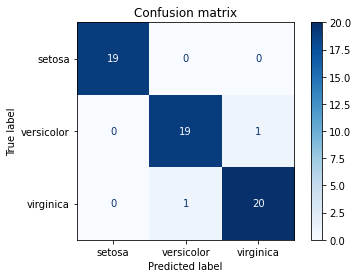

learning done in 0.0 seconds
Macro F1 score :  0.9674603174603176


0.9674603174603176

In [9]:
def make_svc_model(kernel="linear", C=4, decision_function_shape="ovo"):
    """
    Make a SVC model. Default parameters are the ones given in the lab.
    """
    # default constructor
    mySvc = svm.SVC(kernel=kernel, C=C, decision_function_shape=decision_function_shape)
    # learning
    time_start = time.perf_counter()
    mySvc.fit(X_train, y_train)
    time_elapsed = time.perf_counter() - time_start
    print(f"learning done in {round(time_elapsed, 2)} seconds")
    return mySvc


def plot_cm_from_svc(mySvc=None):
    """
    Plot confusion matrix from SVC. Default SVC is the default of `make_svc_model()` function.
    """
    if mySvc is None:
        mySvc = make_svc_model()
    # test performances
    y_pred = mySvc.predict(X_test)

    disp = ConfusionMatrixDisplay.from_estimator(
        estimator=mySvc,
        X=X_test,
        y=y_test,
        display_labels=list(iris.target_names),
        cmap=plt.cm.Blues,
        normalize=None,
    )
    disp.ax_.set_title("Confusion matrix")
    plt.show()

def f1_score_from_svc(mySvc=None):
    """
    Compute F1 score from SVC. Default SVC is the default of `make_svc_model()` function.
    """
    if mySvc is None:
        mySvc = make_svc_model()
    y_pred = mySvc.predict(X_test)
    f1 = f1_score(y_pred, y_test, average="macro")
    print("Macro F1 score : ", f1)
    return f1


plot_cm_from_svc()
f1_score_from_svc()


Can we do it better? Try other kernels, other hyper-parameters (C, ...)


### My trials


Try other kernels, other hyper-parameters (C, ...), 'ovo' or 'ovr' for the multiclass problem.


In [10]:
# custom gridsearch, with plot of confusion matrix
# it's fine to use a naive, almost brute-force implementation
# because the dataset is small and the classifier runs quickly 

best_param = {}
best_f1 = -999 # dummy value

for kernel in ["linear", "poly", "rbf", "sigmoid"]:
    for C in [1, 2, 5, 10, 9999]:
        for decision_function_shape in ["ovo", "ovr"]:
            print("\n----------------------")
            print(f"kernel:\t{kernel}")
            print(f"C:\t{C}")
            print(f"decision_function_shape:\t{decision_function_shape}\n")
            
            mySvc = make_svc_model(
                kernel=kernel,
                C=C,
                decision_function_shape=decision_function_shape,
            )
            # plot_cm_from_svc(mySvc=mySvc) # uncomment to display Confusion Matrix on each iteration
            
            f1 = f1_score_from_svc(mySvc=mySvc)
            if f1 > best_f1:
                best_f1 = f1
                best_param["kernel"] = kernel
                best_param["C"] = C
                best_param["decision_function_shape"] = decision_function_shape


----------------------
kernel:	linear
C:	1
decision_function_shape:	ovo

learning done in 0.0 seconds
Macro F1 score :  0.9349206349206348

----------------------
kernel:	linear
C:	1
decision_function_shape:	ovr

learning done in 0.0 seconds
Macro F1 score :  0.9349206349206348

----------------------
kernel:	linear
C:	2
decision_function_shape:	ovo

learning done in 0.0 seconds
Macro F1 score :  0.9674603174603176

----------------------
kernel:	linear
C:	2
decision_function_shape:	ovr

learning done in 0.0 seconds
Macro F1 score :  0.9674603174603176

----------------------
kernel:	linear
C:	5
decision_function_shape:	ovo

learning done in 0.0 seconds
Macro F1 score :  0.9674603174603176

----------------------
kernel:	linear
C:	5
decision_function_shape:	ovr

learning done in 0.0 seconds
Macro F1 score :  0.9674603174603176

----------------------
kernel:	linear
C:	10
decision_function_shape:	ovo

learning done in 0.0 seconds
Macro F1 score :  0.9349206349206348

------------------

In [11]:
print(f"The best parameters are: {best_param}")
print(f"and the best macro f1-score is: {best_f1}")

The best parameters are: {'kernel': 'linear', 'C': 2, 'decision_function_shape': 'ovo'}
and the best macro f1-score is: 0.9674603174603176


This dataset is too easy. On some occasions, we get perfect prediction. We try on a harder one.

## dataset: MNIST


In [12]:
# necessary imports
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score


In [13]:
# reading the dataset
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0


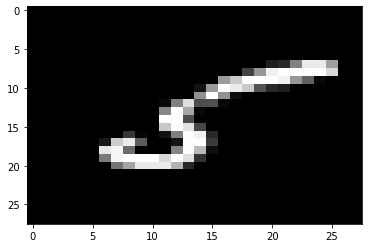

5


In [14]:
# display one of the pictures (the 11th in this code)
import matplotlib.pyplot as plt

i = 11  # index of the image: change it in order to display other images
plt.imshow(x_train[i], aspect="auto", cmap="gray")
plt.show()
print(y_train[i])


In [15]:
# case of binary classification: we choose coats and bags

# you can change the classes
class1 = 4  # negative class 'coats'
class2 = 8  # positive class 'bags'
nameClass1 = "4"
nameClass2 = "8"
mesClassesTrain = (y_train == class1) | (y_train == class2)
mesClassesTest = (y_test == class1) | (y_test == class2)

## TRAIN
x_trainBinaire = np.array(x_train[mesClassesTrain, :])
y_trainBinaire = np.array((y_train[mesClassesTrain] - class1) / (class2 - class1))

## TEST
x_testBinaire = np.array(x_test[mesClassesTest, :])
y_testBinaire = np.array((y_test[mesClassesTest] - class1) / (class2 - class1))


In [16]:
# reshaping the data (a 2d image is transformed to a 1d array)
# train
n = x_trainBinaire.shape[0]
x_trainBinaireLin = x_trainBinaire.reshape(n, -1)
# test
n = x_testBinaire.shape[0]
x_testBinaireLin = x_testBinaire.reshape(n, -1)


In [17]:
# default constructor
# learning
time_start = time.perf_counter()
svc_bin = svm.SVC()
svc_bin.fit(x_trainBinaireLin, y_trainBinaire)
## your job is to train your SVC classifier
time_elapsed = time.perf_counter() - time_start
print("learning done in %.2f seconds" % (time_elapsed))


learning done in 4.62 seconds


F1 score :  0.9969167523124358


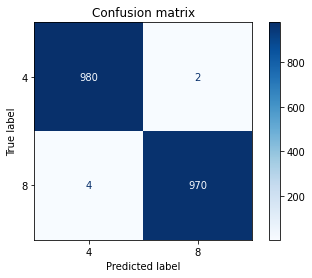

In [18]:
y_predBinaireTest = svc_bin.predict(x_testBinaireLin)

disp = ConfusionMatrixDisplay.from_predictions(
    y_true=y_testBinaire,
    y_pred=y_predBinaireTest,
    display_labels=[nameClass1, nameClass2],
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix")
print("F1 score : ", f1_score(y_predBinaireTest, y_testBinaire))


Same question as for the Iris dataset: can you improve the results by tuning hyper-parameters or changing the kernel ?


## The whole dataset with the 10 classes


In [19]:
x_train_initial = x_train
y_train_initial = y_train

In [20]:
n_cut = 1000 # use part of the dataset to save time, can be removed to use the whole dataset
x_train = x_train_initial[:n_cut]
y_train = y_train_initial[:n_cut]
x_train.shape, y_train.shape

((1000, 28, 28), (1000,))

In [21]:
# reshaping the data (a 2d image is transformed to a 1d array)
# train
n = x_train.shape[0]
x_trainLin = x_train.reshape(n, -1)
# test
n = x_test.shape[0]
x_testLin = x_test.reshape(n, -1)


In [22]:
# default constructor
mysvc = svm.SVC(kernel="linear", C=1)  # ,decision_function_shape='ovr')
# learning
time_start = time.perf_counter()
mysvc.fit(x_trainLin, y_train)
time_elapsed = time.perf_counter() - time_start
print("learning done in %.2f seconds" % (time_elapsed))


learning done in 0.13 seconds


F1 score :  0.8739210926804951


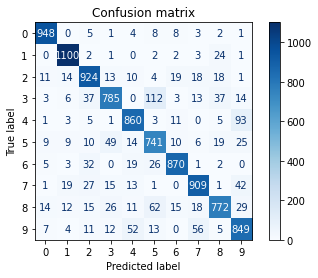

In [23]:
y_predTest = mysvc.predict(x_testLin)

disp = ConfusionMatrixDisplay.from_predictions(
    y_true=y_test, 
    y_pred=y_predTest, 
    display_labels=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"],
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix")
print("F1 score : ", f1_score(y_predTest, y_test, average="macro"))


In [24]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

paramGrid = [
    {
        "C": [0.1, 0.2, 0.5, 1, 2, 5, 10],
        "kernel": ["linear"],
    },
    {
        "C": [0.5, 1, 5, 10],
        "degree": [2, 3],
        "coef0": [-1, 0, 1],
        "kernel": ["poly"],
    },
]
# searchBestParams = GridSearchCV(svm.SVC(), paramGrid, scoring="f1_macro")
mnist_svc = svm.SVC()
searchBestParams = RandomizedSearchCV(
    estimator=mnist_svc,
    param_distributions=paramGrid,
    scoring="f1_macro",
    n_iter=10,
)
searchBestParams.fit(x_trainLin, y_train)
# searchBestParams
means = searchBestParams.cv_results_["mean_test_score"]
stds = searchBestParams.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, searchBestParams.cv_results_["params"]):
    print(f"{round(mean, 3)} (+/-{round(2*std, 3)}) for {params}")


0.873 (+/-0.031) for {'kernel': 'linear', 'C': 0.2}
0.891 (+/-0.03) for {'kernel': 'poly', 'degree': 3, 'coef0': 1, 'C': 0.5}
0.873 (+/-0.031) for {'kernel': 'linear', 'C': 5}
0.467 (+/-0.138) for {'kernel': 'poly', 'degree': 3, 'coef0': -1, 'C': 1}
0.003 (+/-0.007) for {'kernel': 'poly', 'degree': 2, 'coef0': -1, 'C': 1}
0.884 (+/-0.025) for {'kernel': 'poly', 'degree': 2, 'coef0': 0, 'C': 1}
0.4 (+/-0.08) for {'kernel': 'poly', 'degree': 3, 'coef0': -1, 'C': 10}
0.876 (+/-0.022) for {'kernel': 'poly', 'degree': 3, 'coef0': 0, 'C': 5}
0.888 (+/-0.021) for {'kernel': 'poly', 'degree': 2, 'coef0': 0, 'C': 10}
0.824 (+/-0.03) for {'kernel': 'poly', 'degree': 3, 'coef0': 0, 'C': 0.5}


In [25]:
best_mnist_svc = searchBestParams
best_mnist_svc.best_estimator_.fit(x_trainLin, y_train)

y_pred_mnist = best_mnist_svc.predict(x_testLin)
f1_mnist = f1_score(y_test, y_pred_mnist, average="macro")
print(
    f"f1 score for MNIST: {round(f1_mnist, 4)}",
    f"achieved with parameters: {best_mnist_svc.best_params_}",
    sep="\n",
)


f1 score for MNIST: 0.9021
achieved with parameters: {'kernel': 'poly', 'degree': 3, 'coef0': 1, 'C': 0.5}


## Do you obtain the same results with FMNIST ? (fashion MNIST)


In [26]:
# reading the dataset
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0


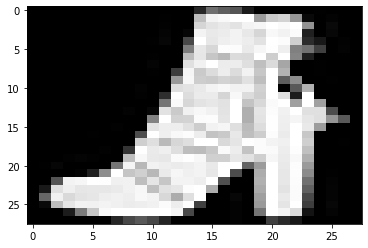

9


In [27]:
i = 11  # index of the image: change it in order to display other images
plt.imshow(x_train[i], aspect="auto", cmap="gray")
plt.show()
print(y_train[i])


In [28]:
x_train_initial = x_train
y_train_initial = y_train

In [29]:
# n_cut = 1000
x_train = x_train_initial[:n_cut]
y_train = y_train_initial[:n_cut]
x_train.shape, y_train.shape

((1000, 28, 28), (1000,))

In [30]:
# reshaping the data (a 2d image is transformed to a 1d array)
# train
n = x_train.shape[0]
x_trainLin = x_train.reshape(n, -1)
# test
n = x_test.shape[0]
x_testLin = x_test.reshape(n, -1)


In [31]:
# default constructor
mysvc = svm.SVC(kernel="linear", C=1)  # ,decision_function_shape='ovr')
# learning
time_start = time.perf_counter()
mysvc.fit(x_trainLin, y_train)
time_elapsed = time.perf_counter() - time_start
print("learning done in %.2f seconds" % (time_elapsed))


learning done in 0.14 seconds


F1 score :  0.7876725328428863


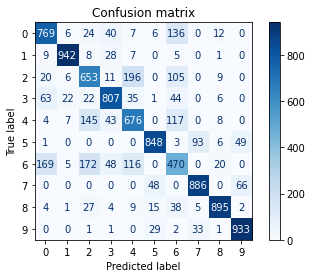

In [32]:
y_predTest = mysvc.predict(x_testLin)

disp = ConfusionMatrixDisplay.from_predictions(
    y_true=y_test, 
    y_pred=y_predTest, 
    display_labels=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"],
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix")
print("F1 score : ", f1_score(y_predTest, y_test, average="macro"))


In [33]:
import plotly.express as px

# visualize what an exponential distribution looks like
# we can play with the `scale` parameter to target
# desired values for RandomSearchCV
scale = 2
px.histogram(
    np.random.exponential(scale=scale, size=10000),
    title=f"Empirical exponential distribution (scale={scale})",
)


In [34]:
paramGrid = [
    {
        "C": np.random.exponential(scale=2, size=1000), # many points around 0.5
        "kernel": ["linear"],
    },
    {
        "C": np.random.exponential(scale=2, size=100),
        "degree": [2, 3],
        "coef0": [-1, 0, 1],
        "kernel": ["poly"],
    },
]
# searchBestParams = GridSearchCV(svm.SVC(), paramGrid, scoring="f1_macro")
fmnist_svc = svm.SVC()
searchBestParams = RandomizedSearchCV(
    estimator=fmnist_svc,
    param_distributions=paramGrid,
    scoring="f1_macro",
    n_iter=10,
)
searchBestParams.fit(x_trainLin, y_train)

means = searchBestParams.cv_results_["mean_test_score"]
stds = searchBestParams.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, searchBestParams.cv_results_["params"]):
    print(f"{round(mean, 3)} (+/-{round(2*std, 3)}) for {params}")


0.791 (+/-0.075) for {'kernel': 'linear', 'C': 1.7560260376707395}
0.815 (+/-0.067) for {'kernel': 'linear', 'C': 0.02848805959614351}
0.25 (+/-0.081) for {'kernel': 'poly', 'degree': 2, 'coef0': -1, 'C': 2.436536322551805}
0.791 (+/-0.075) for {'kernel': 'linear', 'C': 2.4355427839308854}
0.791 (+/-0.075) for {'kernel': 'linear', 'C': 1.150213098915371}
0.791 (+/-0.075) for {'kernel': 'linear', 'C': 1.407283897586169}
0.791 (+/-0.075) for {'kernel': 'linear', 'C': 7.393677397161017}
0.791 (+/-0.075) for {'kernel': 'linear', 'C': 2.042286558980561}
0.797 (+/-0.06) for {'kernel': 'poly', 'degree': 3, 'coef0': 1, 'C': 0.2587308795054791}
0.791 (+/-0.075) for {'kernel': 'linear', 'C': 10.025858964336836}


In [35]:
best_fmnist_svc = searchBestParams
best_fmnist_svc.best_estimator_.fit(x_trainLin, y_train)

y_pred_fmnist = best_fmnist_svc.predict(x_testLin)
f1_fmnist = f1_score(y_test, y_pred_fmnist, average="macro")
print(
    f"f1 score for FfMNIST: {round(f1_fmnist, 4)}",
    f"achieved with parameters: {best_fmnist_svc.best_params_}",
    sep="\n",
)


f1 score for FfMNIST: 0.7953
achieved with parameters: {'kernel': 'linear', 'C': 0.02848805959614351}


## Active learning with SVM


Start with few annoted data and iterate by asking new labelled data and re-learn SVM separation. Try different selection of new labelled data.


In [36]:
from sklearn.utils import shuffle
import pandas as pd


In [37]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# select classes to keep
class1 = 2
class2 = 4
assert class1 < class2, "class1 should be less than class2"

# filter classes
mask_keep_classes_train = (y_train == class1) | (y_train == class2)
mask_keep_classes_test = (y_test == class1) | (y_test == class2)

# make train data binary
X_train = X_train[mask_keep_classes_train]
y_train = (y_train[mask_keep_classes_train] - class1) / (class2 - class1)

# make test data binary
X_test = X_test[mask_keep_classes_test]
y_test = (y_test[mask_keep_classes_test] - class1) / (class2 - class1)

# cut train data
X_train = X_train[:n_cut]
y_train = y_train[:n_cut]

# get all pixels in one vector
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print(X_train.reshape(n_cut, -1).shape, y_train.shape, X_test.shape, y_test.shape)

# shuffle train data
X_train, y_train = shuffle(X_train, y_train, random_state=42)


(1000, 784) (1000,) (2014, 784) (2014,)


TODO if further work was possible:
- Remove `n_cut` to work on the whole dataset
- Make a function with parameters
- Work on best version of SVC from parameter search above
- Compare (plot together) various numbers of `N_STARTING_PTS` and `N_NEW_POINTS`

In [38]:
N_STARTING_PTS = 4
N_NEW_POINTS = 2
THRESH = 0.015 # tolerance for stopping criterion
MAX_ITER = 100

idx = 0
f1_store = {}


revealed_indices = np.array(list(range(N_STARTING_PTS)))

while idx < MAX_ITER:
    n_points_curr = len(revealed_indices)

    X_curr = X_train[revealed_indices]
    y_curr = y_train[revealed_indices]

    # compute SVC on current revealed dataset
    svc_curr = svm.SVC()
    svc_curr.fit(X_curr, y_curr)

    y_pred_curr = svc_curr.predict(X_test)

    # store f1 score
    f1_curr = f1_score(y_true=y_test, y_pred=y_pred_curr)
    f1_store[n_points_curr] = f1_curr

    # stopping criterion
    if f1_curr > 1 - THRESH:
        break

    # compute lowest probabilities of either positive or negative prediction
    dec_func = svc_curr.decision_function(X_train)
    certainty = np.abs(dec_func)
    most_uncertain = np.argsort(certainty)

    # reveal most uncertain points
    revealed_indices = np.concatenate([revealed_indices, most_uncertain[:N_NEW_POINTS]])
    
    idx += 1

f1_store


{4: 0.6557595993322204,
 6: 0.7101449275362319,
 8: 0.8488305761551627,
 10: 0.8135168961201502,
 12: 0.9402677651905254,
 14: 0.958182756840475,
 16: 0.9303888622179548,
 18: 0.9561629706034038,
 20: 0.9635336414997431,
 22: 0.9522417153996101,
 24: 0.9472665699080793,
 26: 0.9715142428785606,
 28: 0.9778672032193158,
 30: 0.9613313754282916,
 32: 0.9795102448775612,
 34: 0.981018981018981,
 36: 0.9752321981424149,
 38: 0.9773755656108597,
 40: 0.9800715380684721,
 42: 0.9789635710620831,
 44: 0.9804902451225612,
 46: 0.9825997952917093,
 48: 0.9813602015113351,
 50: 0.9790066564260111,
 52: 0.9730010384215991,
 54: 0.9836901121304792,
 56: 0.9810935104752171,
 58: 0.9831718510963795,
 60: 0.9779825908858167,
 62: 0.9797775530839231,
 64: 0.979969183359014,
 66: 0.9799485861182521,
 68: 0.9692227438706311,
 70: 0.9784394250513346,
 72: 0.9802130898021308,
 74: 0.980431510286001,
 76: 0.9814350225790266,
 78: 0.9858299595141701}

In [39]:
df = pd.DataFrame()
df["n_pts"] = f1_store.keys()
df["f1_score"] = f1_store.values()

px.line(df, "n_pts", "f1_score", log_x=1)